In [20]:
import numpy as np
import sklearn

from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [54]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [9]:
X = iris.data
y = iris.target

In [12]:
X.shape

(150, 4)

In [133]:
np.sum(y == 0)

50

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [93]:
import pandas as pd
from pandas import DataFrame

In [100]:
iris.target.shape
iris.data.shape

(150, 4)

In [105]:
iris_complete = np.column_stack((iris.data, iris.target))

In [106]:
iris_complete.shape

(150, 5)

In [107]:
frame = DataFrame(iris_complete, 
                  columns=['sepal length', 'sepal width', 
                           'petal length', 'petal width', 'type'])

In [109]:
frame[:15]

,sepal length,sepal width,petal length,petal width,type
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [127]:
from sklearn.model_selection import train_test_split

In [128]:
train_test_split?

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [117]:
from sklearn.naive_bayes import GaussianNB

In [118]:
GaussianNB?

In [119]:
GnB = GaussianNB()

In [120]:
GnB.fit(X_train, y_train)

GaussianNB(priors=None)

In [121]:
from sklearn.model_selection import cross_val_score

In [122]:
cross_val_score(GnB, X_train, y_train, cv=3)

array([ 0.95 ,  0.9  ,  0.975])

In [123]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [124]:
def stratified_CV(X, y, model, n_splits=3, random_state=None):
    skfolds = StratifiedKFold(n_splits=n_splits, random_state=random_state)
    accuracy_list = []
    
    for train_index, test_index in skfolds.split(X, y):
        clone_clf = clone(model)
        X_train_folds = X[train_index]
        y_train_folds = y[train_index]
        X_test_fold = X[test_index]
        y_test_fold = y[test_index]
        
        clone_clf.fit(X_train_folds, y_train_folds)
        y_pred = clone_clf.predict(X_test_fold)
        n_correct = sum(y_pred == y_test_fold)
        
        accuracy_list.append(n_correct / len(y_pred))
        
    return accuracy_list

In [125]:
stratified_CV(X_train, y_train, GnB)

[0.94999999999999996, 0.90000000000000002, 0.97499999999999998]

In [129]:
from sklearn.metrics import accuracy_score

In [134]:
accuracy_score(GnB.predict(X_test), y_test)

0.93333333333333335

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
log_model = LogisticRegression()

In [137]:
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [140]:
cross_val_score(log_model, X_train, y_train, cv=3)

array([ 0.95121951,  0.95      ,  0.94871795])

In [142]:
accuracy_score(log_model.predict(X_test), y_test)

1.0

In [144]:
from sklearn.decomposition import PCA

In [177]:
pca_iris = PCA(0.95)

In [180]:
pca_iris.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [181]:
pca_iris.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [171]:
from matplotlib import pyplot as plt

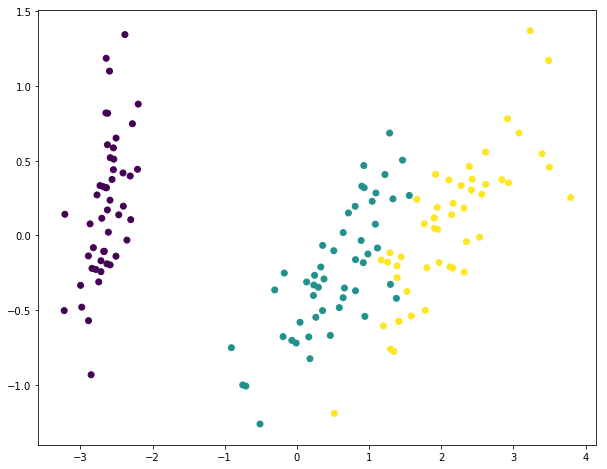

In [168]:
%matplotlib inline
fig_b, ax_b = plt.subplots(figsize=(10, 8))

ax_b.scatter(X2D[:, 0], X2D[:, 1], c=iris.target)

## Working out the diabetes dataset

In [182]:
breast_cancer = datasets.load_breast_cancer()

In [45]:
print(breast_cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [183]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

In [191]:
pca_breast = PCA(0.99)

In [192]:
pca_breast.fit(breast_cancer.data)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [193]:
pca_breast.components_

array([[  5.08623202e-03,   2.19657026e-03,   3.50763298e-02,
          5.16826469e-01,   4.23694535e-06,   4.05260047e-05,
          8.19399539e-05,   4.77807775e-05,   7.07804332e-06,
         -2.62155251e-06,   3.13742507e-04,  -6.50984008e-05,
          2.23634150e-03,   5.57271669e-02,  -8.05646029e-07,
          5.51918197e-06,   8.87094462e-06,   3.27915009e-06,
         -1.24101836e-06,  -8.54530832e-08,   7.15473257e-03,
          3.06736622e-03,   4.94576447e-02,   8.52063392e-01,
          6.42005481e-06,   1.01275937e-04,   1.68928625e-04,
          7.36658178e-05,   1.78986262e-05,   1.61356159e-06],
       [  9.28705650e-03,  -2.88160658e-03,   6.27480827e-02,
          8.51823720e-01,  -1.48194356e-05,  -2.68862249e-06,
          7.51419574e-05,   4.63501038e-05,  -2.52430431e-05,
         -1.61197148e-05,  -5.38692831e-05,   3.48370414e-04,
          8.19640791e-04,   7.51112451e-03,   1.49438131e-06,
          1.27357957e-05,   2.86921009e-05,   9.36007477e-06,
       